# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 582


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | manay
Processing Record 2 of Set 1 | petropavlovsk-kamchatsky
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | hawaiian paradise park
Processing Record 5 of Set 1 | salinopolis
Processing Record 6 of Set 1 | kachia
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | thompson
Processing Record 9 of Set 1 | edinburgh of the seven seas
Processing Record 10 of Set 1 | kourou
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | colonia
Processing Record 13 of Set 1 | constantia
Processing Record 14 of Set 1 | kuala tungkal
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | pisco
Processing Record 17 of Set 1 | avarua
Processing Record 18 of Set 1 | port-aux-francais
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | papatowai
Processing Record 21 of Set 1 | coquimbo
Processing Record 2

Processing Record 42 of Set 4 | salekhard
Processing Record 43 of Set 4 | selfoss
Processing Record 44 of Set 4 | lodja
Processing Record 45 of Set 4 | newman
Processing Record 46 of Set 4 | east tamworth
Processing Record 47 of Set 4 | solnechnyy
Processing Record 48 of Set 4 | veinticinco de mayo
Processing Record 49 of Set 4 | santa marta
Processing Record 0 of Set 5 | yanykurgan
Processing Record 1 of Set 5 | mount isa
Processing Record 2 of Set 5 | yangor
City not found. Skipping...
Processing Record 3 of Set 5 | shar'ya
Processing Record 4 of Set 5 | acapulco de juarez
Processing Record 5 of Set 5 | sao miguel
Processing Record 6 of Set 5 | sonsorol village
City not found. Skipping...
Processing Record 7 of Set 5 | larroque
Processing Record 8 of Set 5 | yongchuan
Processing Record 9 of Set 5 | baie-comeau
Processing Record 10 of Set 5 | kalabo
Processing Record 11 of Set 5 | hirara
Processing Record 12 of Set 5 | horta
Processing Record 13 of Set 5 | tynda
Processing Record 14 o

Processing Record 32 of Set 8 | dunedin
Processing Record 33 of Set 8 | camocim
Processing Record 34 of Set 8 | akureyri
Processing Record 35 of Set 8 | miki
Processing Record 36 of Set 8 | medina
Processing Record 37 of Set 8 | cestos city
Processing Record 38 of Set 8 | bondo
Processing Record 39 of Set 8 | talara
Processing Record 40 of Set 8 | puerto maldonado
Processing Record 41 of Set 8 | amuntai
Processing Record 42 of Set 8 | altai
Processing Record 43 of Set 8 | steinkjer
Processing Record 44 of Set 8 | axim
Processing Record 45 of Set 8 | aras-asan
Processing Record 46 of Set 8 | bamboo flat
Processing Record 47 of Set 8 | north bend
Processing Record 48 of Set 8 | limon
Processing Record 49 of Set 8 | waitara
Processing Record 0 of Set 9 | cabugao
Processing Record 1 of Set 9 | figuig (centre)
Processing Record 2 of Set 9 | gadhada
Processing Record 3 of Set 9 | taltal
Processing Record 4 of Set 9 | ma'rib
Processing Record 5 of Set 9 | chernyshevskiy
Processing Record 6 of

Processing Record 23 of Set 12 | banyo
Processing Record 24 of Set 12 | meulaboh
Processing Record 25 of Set 12 | eyl
Processing Record 26 of Set 12 | tamiahua
Processing Record 27 of Set 12 | angaur state
Processing Record 28 of Set 12 | laguna
Processing Record 29 of Set 12 | nouadhibou
Processing Record 30 of Set 12 | belomorsk
Processing Record 31 of Set 12 | cadale
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df['Date'] = pd.to_datetime(city_data_df['Date'],unit='s').dt.date

# Show Record Count
city_data_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,manay,7.2150,126.5397,302.22,65,99,4.14,PH,2024-09-17
1,petropavlovsk-kamchatsky,53.0452,158.6483,287.48,38,20,5.00,RU,2024-09-17
2,puerto ayora,-0.7393,-90.3518,294.57,95,62,1.79,EC,2024-09-17
3,hawaiian paradise park,19.5933,-154.9731,301.89,77,100,3.09,US,2024-09-17
4,salinopolis,-0.6136,-47.3561,300.00,79,1,6.03,BR,2024-09-17


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,manay,7.2150,126.5397,302.22,65,99,4.14,PH,2024-09-17
1,petropavlovsk-kamchatsky,53.0452,158.6483,287.48,38,20,5.00,RU,2024-09-17
2,puerto ayora,-0.7393,-90.3518,294.57,95,62,1.79,EC,2024-09-17
3,hawaiian paradise park,19.5933,-154.9731,301.89,77,100,3.09,US,2024-09-17
4,salinopolis,-0.6136,-47.3561,300.00,79,1,6.03,BR,2024-09-17


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

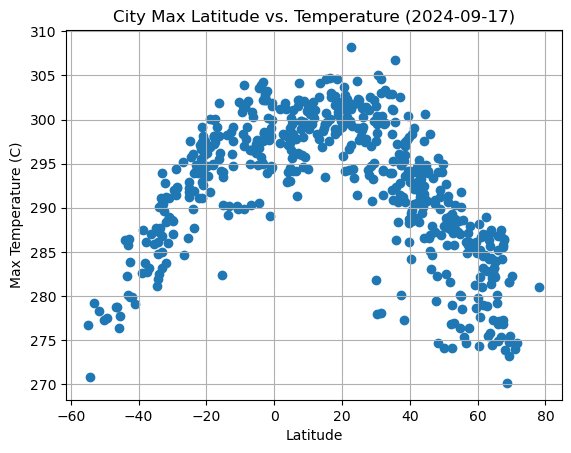

In [8]:
# Build scatter plot for latitude vs. temperature
city_data_lat = city_data_df['Lat']
city_data_temp = city_data_df['Max Temp']
latest_date = city_data_df['Date'].max()
plt.scatter(city_data_lat, city_data_temp)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title(f"City Max Latitude vs. Temperature ({latest_date})")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

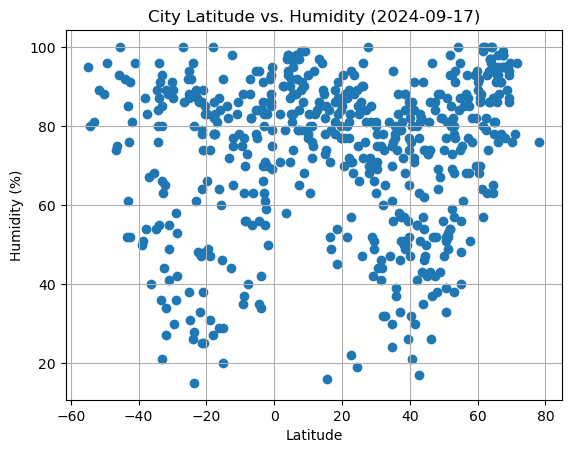

In [9]:
# Build the scatter plots for latitude vs. humidity
city_data_lat = city_data_df['Lat']
city_data_humidity = city_data_df['Humidity']
latest_date = city_data_df['Date'].max()
plt.scatter(city_data_lat, city_data_humidity)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"City Latitude vs. Humidity ({latest_date})")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

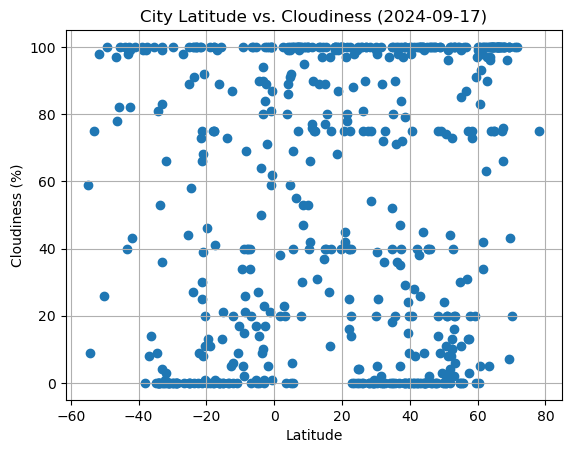

In [10]:
# Build the scatter plots for latitude vs. cloudiness
city_data_lat = city_data_df['Lat']
city_data_cloudiness = city_data_df['Cloudiness']
latest_date = city_data_df['Date'].max()
plt.scatter(city_data_lat, city_data_cloudiness)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"City Latitude vs. Cloudiness ({latest_date})")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

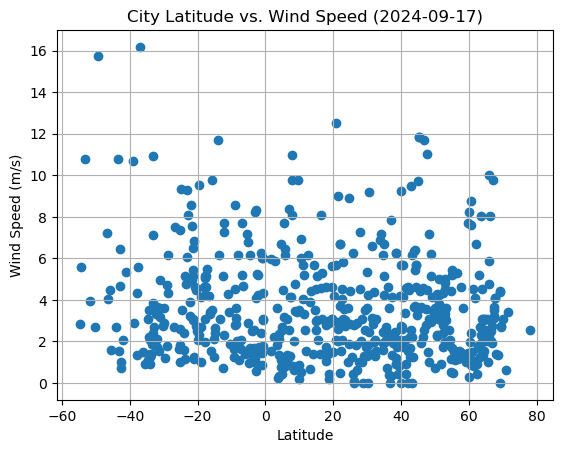

In [11]:
# Build the scatter plots for latitude vs. wind speed
city_data_lat = city_data_df['Lat']
city_data_wind_speed = city_data_df['Wind Speed']
latest_date = city_data_df['Date'].max()
plt.scatter(city_data_lat, city_data_wind_speed)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(f"City Latitude vs. Wind Speed ({latest_date})")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def lin_regress(df, y_value, coordinates=(0,0)):
    x = df['Lat']
    y = df[y_value]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x, regress_values,"r-")

    plt.xlabel('Latitude')
    plt.ylabel (y_value)
    plt.title(f'Latitude vs {y_value}')
    plt.annotate(line_eq, coordinates, fontsize=15, color='red')

    print(f"The r^2-value is: {rvalue**2}")
    
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,manay,7.2150,126.5397,302.22,65,99,4.14,PH,2024-09-17
1,petropavlovsk-kamchatsky,53.0452,158.6483,287.48,38,20,5.00,RU,2024-09-17
3,hawaiian paradise park,19.5933,-154.9731,301.89,77,100,3.09,US,2024-09-17
5,kachia,9.8667,7.9500,294.37,93,100,0.84,NG,2024-09-17
7,thompson,55.7435,-97.8558,288.57,61,0,1.50,CA,2024-09-17


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,puerto ayora,-0.7393,-90.3518,294.57,95,62,1.79,EC,2024-09-17
4,salinopolis,-0.6136,-47.3561,300.00,79,1,6.03,BR,2024-09-17
6,blackmans bay,-43.0167,147.3167,285.78,61,98,6.47,AU,2024-09-17
8,edinburgh of the seven seas,-37.0676,-12.3116,283.13,67,8,16.18,SH,2024-09-17
10,grytviken,-54.2811,-36.5092,270.83,80,9,5.60,GS,2024-09-17


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.6184377109832693


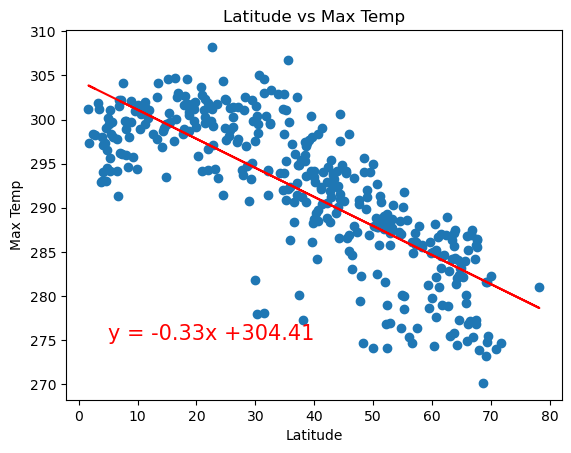

In [15]:
# Linear regression on Northern Hemisphere
lin_regress(northern_hemi_df,'Max Temp',(5,275))

The r^2-value is: 0.6963909996446626


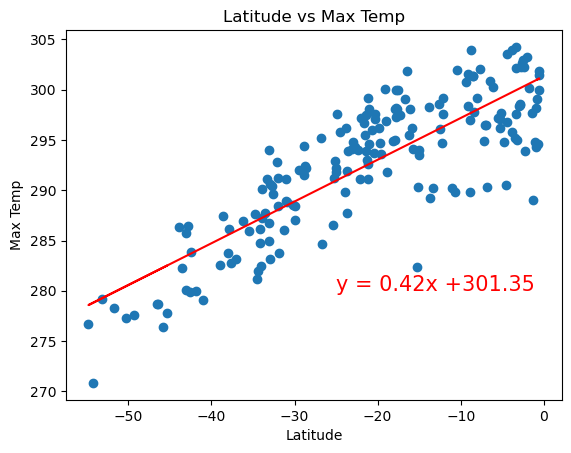

In [16]:
# Linear regression on Southern Hemisphere
lin_regress(southern_hemi_df,'Max Temp',(-25,280))

**Discussion about the linear relationship:** Based on the graphs above, there seems to be a positive linear relationship. As latitude increases away from 0 degree in the Northern Hemisphere, the max temperature decreases. 

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 9.542371516393545e-05


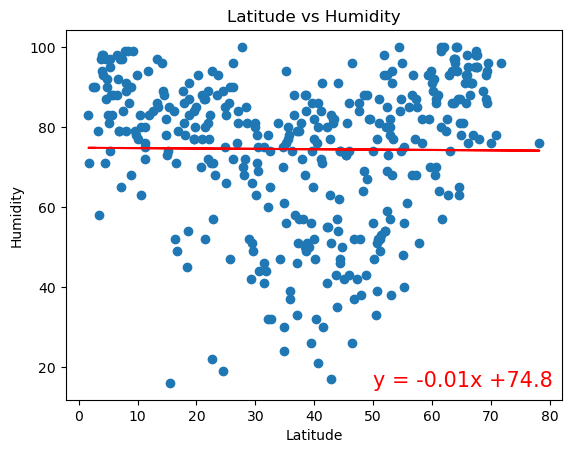

In [17]:
# Northern Hemisphere
lin_regress(northern_hemi_df,'Humidity',(50,15))

The r^2-value is: 0.0007023651559215845


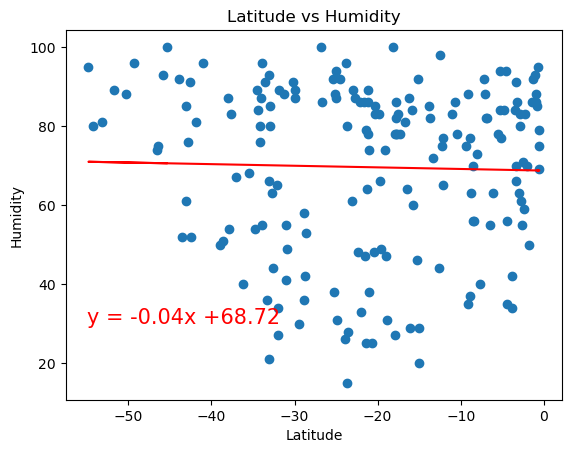

In [18]:
# Southern Hemisphere
lin_regress(southern_hemi_df,'Humidity',(-55,30))

**Discussion about the linear relationship:** Based on the graphs above, it looks like there is a non-linear relationship. Also both the r^2 value suggests there is a weak relationship between two variables.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 1.0684404399307233e-05


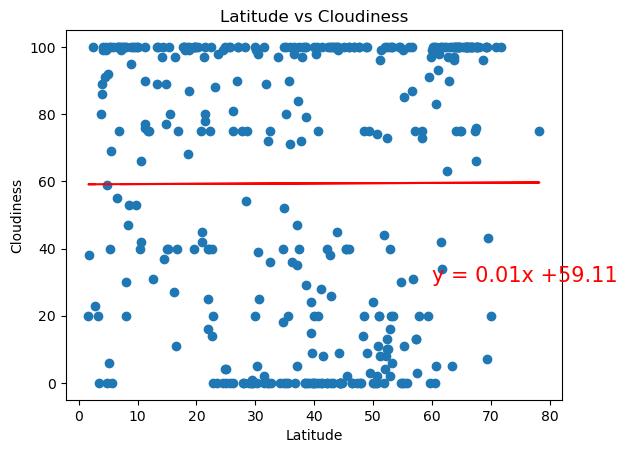

In [19]:
# Northern Hemisphere
lin_regress(northern_hemi_df,'Cloudiness',(60,30))

The r^2-value is: 0.005556990448673867


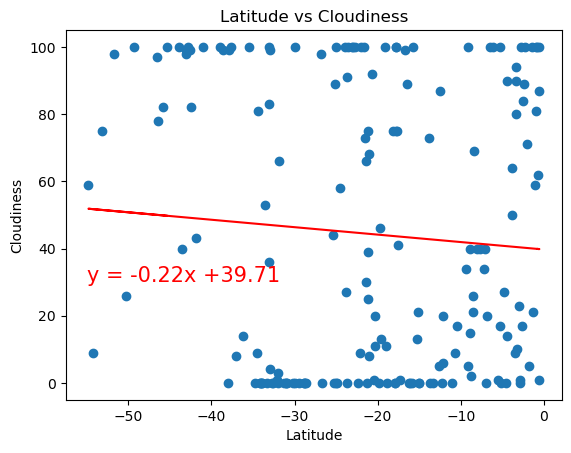

In [20]:
# Southern Hemisphere
lin_regress(southern_hemi_df,'Cloudiness',(-55,30))

**Discussion about the linear relationship:** The graphs above show that there is a non-linear relationship and the r^2 value suggest there is a weak relationship between the two variables.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.0010618919858951927


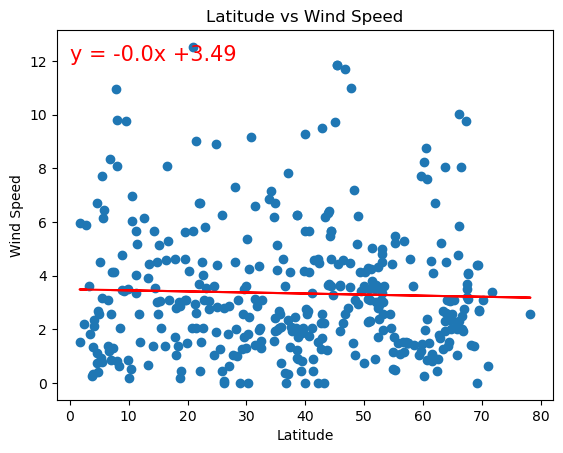

In [23]:
# Northern Hemisphere
lin_regress(northern_hemi_df,'Wind Speed',(0,12))

The r^2-value is: 0.017289190986327262


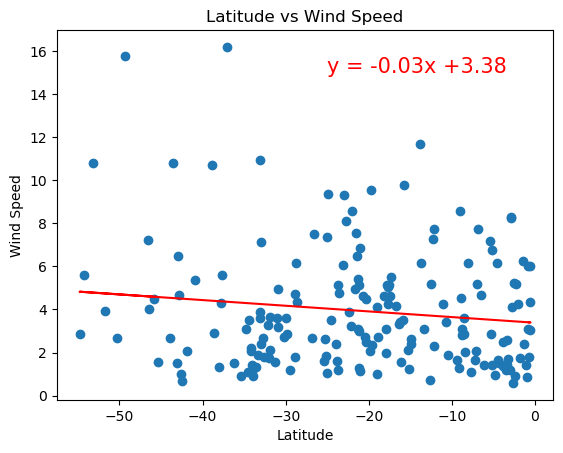

In [22]:
# Southern Hemisphere
lin_regress(southern_hemi_df,'Wind Speed',(-25,15))

**Discussion about the linear relationship:** Similar to the cloudiness and humidity graphs, there is a really small r^2 values, which suggest a weak relationship. Also, the graph shows non-linear relationship.